In [1]:
import numpy
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.colors import LinearSegmentedColormap
import xarray
import cmocean
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import cartopy.feature as cfeature
import statsmodels.stats.multitest

data1 = xarray.open_dataset('data1.nc')
data5 = xarray.open_dataset('data5.nc')
data15 = xarray.open_dataset('data15.nc')

/homes/ebach/miniconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
data1['fdr_vort_to_sst'] = (('lat', 'lon', 'delay_sig'), numpy.full([241, 480, 7], numpy.NaN))
data1['fdr_sst_to_vort'] = (('lat', 'lon', 'delay_sig'), numpy.full([241, 480, 7], numpy.NaN))

for lat in data1.lat:
    for lon in data1.lon:
        data1['fdr_vort_to_sst'][lat - 1, lon - 1, :] = statsmodels.stats.multitest.multipletests(data1['sig_vort_to_sst'][lat - 1, lon - 1, numpy.arange(0, 35, 5)],
                                                                                          alpha=0.1, method='fdr_bh')[0]
        data1['fdr_sst_to_vort'][lat - 1, lon - 1, :] = statsmodels.stats.multitest.multipletests(data1['sig_sst_to_vort'][lat - 1, lon - 1, numpy.arange(0, 35, 5)],
                                                                                  alpha=0.1, method='fdr_bh')[0]

/homes/ebach/miniconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


In [2]:
data5['fdr_vort_to_sst'] = (('lat', 'lon', 'delay_sig'), numpy.full([241, 480, 8], numpy.NaN))
data5['fdr_sst_to_vort'] = (('lat', 'lon', 'delay_sig'), numpy.full([241, 480, 8], numpy.NaN))

for lat in data5.lat:
    for lon in data5.lon:
        data5['fdr_vort_to_sst'][lat - 1, lon - 1, :] = statsmodels.stats.multitest.multipletests(data5['sig_vort_to_sst'][lat - 1, lon - 1, numpy.arange(0, 16, 2)],
                                                                                          alpha=0.1, method='fdr_bh')[0]
        data5['fdr_sst_to_vort'][lat - 1, lon - 1, :] = statsmodels.stats.multitest.multipletests(data5['sig_sst_to_vort'][lat - 1, lon - 1, numpy.arange(0, 16, 2)],
                                                                                  alpha=0.1, method='fdr_bh')[0]

/homes/ebach/miniconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


In [8]:
data15['fdr_vort_to_sst'] = (('lat', 'lon', 'delay_sig'), numpy.full([241, 480, 6], numpy.NaN))
data15['fdr_sst_to_vort'] = (('lat', 'lon', 'delay_sig'), numpy.full([241, 480, 6], numpy.NaN))

for lat in data15.lat:
    for lon in data15.lon:
        data15['fdr_vort_to_sst'][lat - 1, lon - 1, :] = statsmodels.stats.multitest.multipletests(data15['sig_vort_to_sst'][lat - 1, lon - 1, numpy.arange(0, 11, 2)],
                                                                                          alpha=0.1, method='fdr_bh')[0]
        data15['fdr_sst_to_vort'][lat - 1, lon - 1, :] = statsmodels.stats.multitest.multipletests(data15['sig_sst_to_vort'][lat - 1, lon - 1, numpy.arange(0, 11, 2)],
                                                                                  alpha=0.1, method='fdr_bh')[0]

/homes/ebach/miniconda3/lib/python3.6/site-packages/statsmodels/stats/multitest.py:320: RuntimeWarning: invalid value encountered in less_equal
  reject = pvals_sorted <= ecdffactor*alpha


In [4]:
data15

<xarray.Dataset>
Dimensions:           (delay: 11, lat: 241, lon: 480)
Coordinates:
  * lat               (lat) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * lon               (lon) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * delay             (delay) int64 0 1 2 3 4 5 6 7 8 9 10
Data variables:
    F_sst_to_vort     (lat, lon, delay) float64 ...
    F_vort_to_sst     (lat, lon, delay) float64 ...
    mspe_sst_to_vort  (lat, lon, delay) float64 ...
    mspe_vort_to_sst  (lat, lon, delay) float64 ...
    sig_sst_to_vort   (lat, lon, delay) float64 ...
    sig_vort_to_sst   (lat, lon, delay) float64 ...

In [58]:
numpy.arange(0, 16, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14])

In [49]:
data1.to_netcdf('data1p.nc')
data5.to_netcdf('data5p.nc')

In [4]:
data15.to_netcdf('data15p.nc')

In [2]:
data15 = xarray.open_dataset('data15p.nc')

In [20]:
persist_vort_to_sst = numpy.full([241, 480], 0.0)
persist_sst_to_vort = numpy.full([241, 480], 0.0)
for a in range(7):
    mask = (persist_vort_to_sst >= 5*(a - 1)).astype(bool) & (data1['fdr_vort_to_sst'][:, :, a].values != 0)
    persist_vort_to_sst[mask] = (data1['fdr_vort_to_sst'][:, :, a].values*5*a)[mask]
    
    mask = (persist_sst_to_vort >= 5*(a - 1)).astype(bool) & (data1['fdr_sst_to_vort'][:, :, a].values != 0)
    persist_sst_to_vort[mask] = (data1['fdr_sst_to_vort'][:, :, a].values*5*a)[mask]

persist_vort_to_sst[(data1['fdr_vort_to_sst'][:, :, 0] == 0) & (persist_vort_to_sst == 0)] = numpy.NaN
persist_sst_to_vort[(data1['fdr_sst_to_vort'][:, :, 0] == 0) & (persist_sst_to_vort == 0)] = numpy.NaN

In [7]:
persist5_vort_to_sst = numpy.full([241, 480], 0.0)
persist5_sst_to_vort = numpy.full([241, 480], 0.0)
for a in range(8):
    mask = (persist5_vort_to_sst >= 10*(a - 1)).astype(bool) & (data5['fdr_vort_to_sst'][:, :, a].values != 0)
    persist5_vort_to_sst[mask] = (data5['fdr_vort_to_sst'][:, :, a].values*10*a)[mask]
    
    mask = (persist5_sst_to_vort >= 10*(a - 1)).astype(bool) & (data5['fdr_sst_to_vort'][:, :, a].values != 0)
    persist5_sst_to_vort[mask] = (data5['fdr_sst_to_vort'][:, :, a].values*10*a)[mask]

persist5_vort_to_sst[(data5['fdr_vort_to_sst'][:, :, 0] == 0) & (persist5_vort_to_sst == 0)] = numpy.NaN
persist5_sst_to_vort[(data5['fdr_sst_to_vort'][:, :, 0] == 0) & (persist5_sst_to_vort == 0)] = numpy.NaN

In [11]:
persist15_vort_to_sst = numpy.full([241, 480], 0.0)
persist15_sst_to_vort = numpy.full([241, 480], 0.0)
for a in range(6):
    mask = (persist15_vort_to_sst >= 30*(a - 1)).astype(bool) & (data15['fdr_vort_to_sst'][:, :, a].values != 0)
    persist15_vort_to_sst[mask] = (data15['fdr_vort_to_sst'][:, :, a].values*30*a)[mask]
    
    mask = (persist15_sst_to_vort >= 30*(a - 1)).astype(bool) & (data15['fdr_sst_to_vort'][:, :, a].values != 0)
    persist15_sst_to_vort[mask] = (data15['fdr_sst_to_vort'][:, :, a].values*30*a)[mask]

persist15_vort_to_sst[(data15['fdr_vort_to_sst'][:, :, 0] == 0) & (persist15_vort_to_sst == 0)] = numpy.NaN
persist15_sst_to_vort[(data15['fdr_sst_to_vort'][:, :, 0] == 0) & (persist15_sst_to_vort == 0)] = numpy.NaN

In [12]:
numpy.nanmax(persist15_sst_to_vort)

150.0

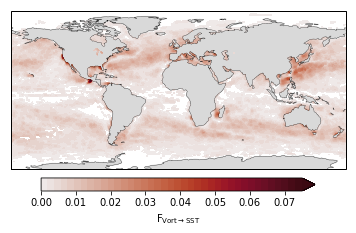

In [137]:
cmap = cmocean.cm.amp
levels = numpy.linspace(0, 0.075, 40)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = data1['F_vort_to_sst'][:, :, 0].values
var_to_plot[data1['sig_vort_to_sst'][:, :, 0] > 0.05] = numpy.NaN

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'$\mathrm{F}_{\mathrm{Vort}\rightarrow\mathrm{SST}}$')
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_vort_to_sst.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


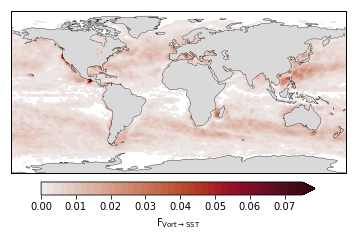

In [136]:
cmap = cmocean.cm.amp
levels = numpy.linspace(0, 0.075, 40)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = scipy.io.loadmat('data/F_vort_to_sst_fixed.mat')['F_vort_to_sst'].T
var_to_plot[scipy.io.loadmat('data/sig_vort_to_sst_fixed.mat')['sig_vort_to_sst'].T > 0.05] = numpy.NaN

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'$\mathrm{F}_{\mathrm{Vort}\rightarrow\mathrm{SST}}$')
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_vort_to_sst_fixed.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in greater
  del sys.path[0]


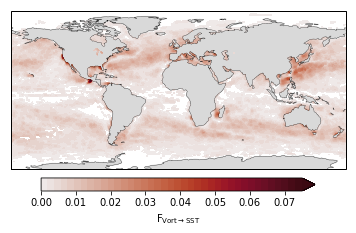

In [139]:
cmap = cmocean.cm.amp
levels = numpy.linspace(0, 0.075, 40)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = scipy.io.loadmat('data/F_vort_to_sst_bic.mat')['F_vort_to_sst'].T
var_to_plot[scipy.io.loadmat('data/sig_vort_to_sst_bic.mat')['sig_vort_to_sst'].T > 0.05] = numpy.NaN

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'$\mathrm{F}_{\mathrm{Vort}\rightarrow\mathrm{SST}}$')
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_vort_to_sst_bic.pdf')

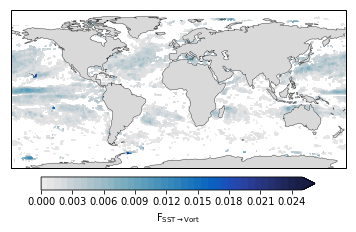

In [138]:
levels = numpy.linspace(0, 0.025, 40)
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = data1['F_sst_to_vort'][:, :, 0].values
var_to_plot[data1['sig_sst_to_vort'][:, :, 0] > 0.05] = numpy.NaN

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'$\mathrm{F}_{\mathrm{SST}\rightarrow\mathrm{Vort}}$')
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_sst_to_vort.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


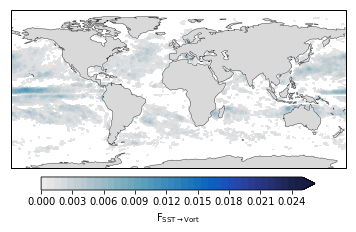

In [135]:
levels = numpy.linspace(0, 0.025, 40)
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = scipy.io.loadmat('data/F_sst_to_vort_fixed.mat')['F_sst_to_vort'].T
var_to_plot[scipy.io.loadmat('data/sig_sst_to_vort_fixed.mat')['sig_sst_to_vort'].T > 0.05] = numpy.NaN

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'$\mathrm{F}_{\mathrm{SST}\rightarrow\mathrm{Vort}}$')
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_sst_to_vort_fixed.pdf')

/homes/ebach/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in greater
  app.launch_new_instance()


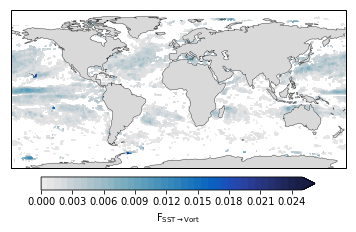

In [140]:
levels = numpy.linspace(0, 0.025, 40)
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = scipy.io.loadmat('data/F_sst_to_vort_bic.mat')['F_sst_to_vort'].T
var_to_plot[scipy.io.loadmat('data/sig_sst_to_vort_bic.mat')['sig_sst_to_vort'].T > 0.05] = numpy.NaN

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.06, pad=0.04)
cb.set_label(r'$\mathrm{F}_{\mathrm{SST}\rightarrow\mathrm{Vort}}$')
tick_locator = ticker.MaxNLocator(nbins=9)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('F_sst_to_vort_bic.pdf')

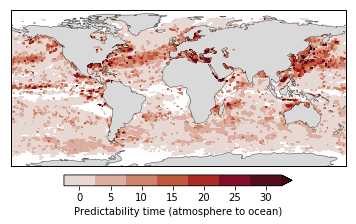

In [29]:
cmap = cmocean.cm.amp
levels = numpy.arange(-2.5, 35, 5)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = persist_vort_to_sst.astype(float)

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04, ticks=numpy.arange(0, 35, 5))
cb.set_label(r'Predictability time (atmosphere to ocean)')
tick_locator = ticker.MaxNLocator(nbins=7)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('time_vort_to_sst.pdf')

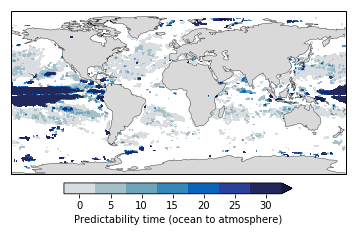

In [30]:
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)
levels = numpy.arange(-2.5, 35, 5)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = persist_sst_to_vort.astype(float)

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04, ticks=numpy.arange(0, 35, 5))
cb.set_label(r'Predictability time (ocean to atmosphere)')
tick_locator = ticker.MaxNLocator(nbins=7)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('time_sst_to_vort.pdf')

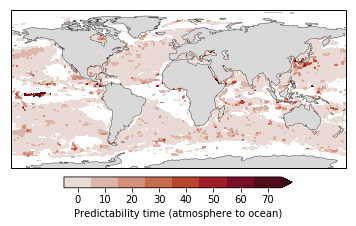

In [8]:
cmap = cmocean.cm.amp
levels = numpy.arange(-5, 80, 10)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = persist5_vort_to_sst.astype(float)

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04, ticks=numpy.arange(0, 80, 10))
cb.set_label(r'Predictability time (atmosphere to ocean)')
tick_locator = ticker.MaxNLocator(nbins=8)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('time5_vort_to_sst.pdf')

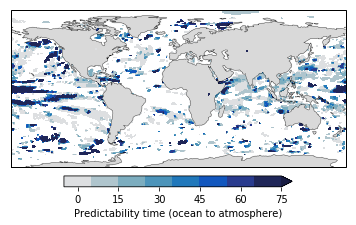

In [11]:
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)
levels = numpy.arange(-5, 80, 10)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = persist5_sst_to_vort.astype(float)

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04, ticks=numpy.arange(0, 80, 10))
cb.set_label(r'Predictability time (ocean to atmosphere)')
tick_locator = ticker.MaxNLocator(nbins=7)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('time5_sst_to_vort.pdf')

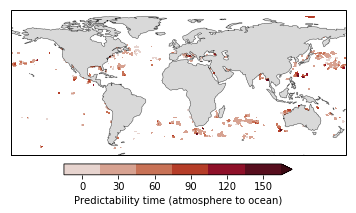

In [16]:
cmap = cmocean.cm.amp
levels = numpy.arange(-15, 180, 30)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = persist15_vort_to_sst.astype(float)

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04, ticks=numpy.arange(0, 180, 30))
cb.set_label(r'Predictability time (atmosphere to ocean)')
tick_locator = ticker.MaxNLocator(nbins=7)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('time15_vort_to_sst.pdf')

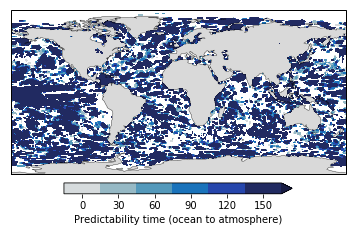

In [14]:
upper_half = numpy.linspace(0.5, 1, 40)
cmap = cmocean.cm.balance_r
colors = cmap(upper_half)
cmap = LinearSegmentedColormap.from_list('Upper Half', colors)
levels = numpy.arange(-15, 180, 30)

plt.figure()
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, color='#D9D9D9')
ax.add_feature(cfeature.COASTLINE, linewidth=0.3)

lat = numpy.arange(-90, -90 + 241*0.75, 0.75)
lon = numpy.arange(0, 480*0.75, 0.75)

var_to_plot = persist15_sst_to_vort.astype(float)

var_cyc, lon_cyc = add_cyclic_point(var_to_plot, coord=lon)
latt, lonn = numpy.meshgrid(lat, lon_cyc)
plt.contourf(lonn, latt, var_cyc.T, vmin=min(levels), vmax=max(levels),
             cmap=cmap, levels=levels, transform=ccrs.PlateCarree(),
             extend='max')
cb = plt.colorbar(orientation='horizontal', fraction=0.05, pad=0.04, ticks=numpy.arange(0, 180, 30))
cb.set_label(r'Predictability time (ocean to atmosphere)')
tick_locator = ticker.MaxNLocator(nbins=7)
cb.locator = tick_locator
cb.update_ticks()
plt.savefig('time15_sst_to_vort.pdf')

<xarray.Dataset>
Dimensions:           (delay: 11, delay_sig: 11, lat: 241, lon: 480)
Coordinates:
  * lat               (lat) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * lon               (lon) int64 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 ...
  * delay             (delay) int64 0 1 2 3 4 5 6 7 8 9 10
Dimensions without coordinates: delay_sig
Data variables:
    F_sst_to_vort     (lat, lon, delay) float64 ...
    F_vort_to_sst     (lat, lon, delay) float64 ...
    mspe_sst_to_vort  (lat, lon, delay) float64 ...
    mspe_vort_to_sst  (lat, lon, delay) float64 ...
    sig_sst_to_vort   (lat, lon, delay) float64 ...
    sig_vort_to_sst   (lat, lon, delay) float64 ...
    fdr_vort_to_sst   (lat, lon, delay_sig) float64 ...
    fdr_sst_to_vort   (lat, lon, delay_sig) float64 ...

In [15]:
numpy.arange(-15, 165, 15)

array([-15,   0,  15,  30,  45,  60,  75,  90, 105, 120, 135, 150])

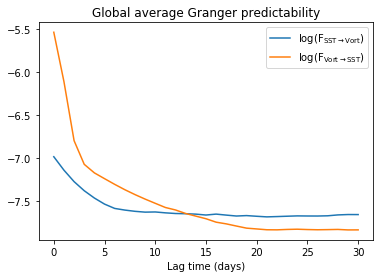

In [6]:
# Decay of predictability with time
plt.plot(numpy.log(data1['F_sst_to_vort'].mean(axis=(0, 1))))
plt.plot(numpy.log(data1['F_vort_to_sst'].mean(axis=(0, 1))))
plt.legend([r'$\log\left(\mathrm{F_{SST\rightarrow Vort}}\right)$', r'$\log\left(\mathrm{F_{Vort\rightarrow SST}}\right)$'])
plt.title('Global average Granger predictability')
plt.xlabel('Lag time (days)')

plt.savefig('predictability_decay.pdf')

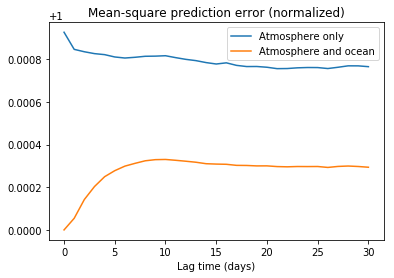

In [7]:
# MSPE increase
mspe_vort = numpy.exp(-(data1['F_sst_to_vort'] - numpy.log(data1['mspe_sst_to_vort'])))
mspe_sst = numpy.exp(-(data1['F_vort_to_sst'] - numpy.log(data1['mspe_vort_to_sst'])))

plt.plot((data1['mspe_sst_to_vort']/mspe_vort[:, :, 0]).mean(axis=(0, 1)))
plt.plot((mspe_vort/mspe_vort[:, :, 0]).mean(axis=(0, 1)))
plt.legend(['Atmosphere only', 'Atmosphere and ocean'])
plt.title('Mean-square prediction error (normalized)')
plt.xlabel('Lag time (days)')

plt.savefig('mspe_sst_to_vort.pdf')

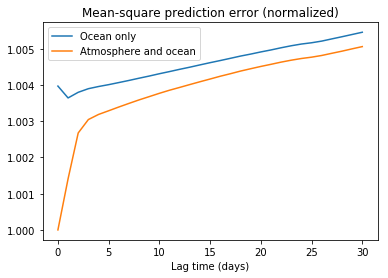

In [8]:
plt.plot((data1['mspe_vort_to_sst']/mspe_sst[:, :, 0]).mean(axis=(0, 1)))
plt.plot((mspe_sst/mspe_sst[:, :, 0]).mean(axis=(0, 1)))
plt.legend(['Ocean only', 'Atmosphere and ocean'])
plt.title('Mean-square prediction error (normalized)')
plt.xlabel('Lag time (days)')

plt.savefig('mspe_vort_to_sst.pdf')